In [1]:
%matplotlib inline


# Comparing different clustering algorithms on toy datasets

This example shows characteristics of different
clustering algorithms on datasets that are "interesting"
but still in 2D. With the exception of the last dataset,
the parameters of each of these dataset-algorithm pairs
has been tuned to produce good clustering results. Some
algorithms are more sensitive to parameter values than
others.

The last dataset is an example of a 'null' situation for
clustering: the data is homogeneous, and there is no good
clustering. For this example, the null dataset uses the
same parameters as the dataset in the row above it, which
represents a mismatch in the parameter values and the
data structure.

While these examples give some intuition about the
algorithms, this intuition might not apply to very high
dimensional data.


In [2]:
import time
import warnings

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

np.random.seed(0)

In [3]:
# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
n_samples = 500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None
# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)
# blobs with varied variances
varied = datasets.make_blobs(
    n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state
)

In [4]:
from visualization import *
from chameleon import *

noisy_circles_df = pd.DataFrame(noisy_circles[0])
noisy_moons_df = pd.DataFrame(noisy_moons[0])
varied_df = pd.DataFrame(varied[0])
aniso_df = pd.DataFrame(aniso[0])
blobs_df = pd.DataFrame(blobs[0])
no_structure_df = pd.DataFrame(no_structure[0])

In [5]:
res_noisy_circles = cluster(noisy_circles_df.copy(), 2, knn=15, m=25, alpha=2.0, verbose=False, plot=False)
res_noisy_moons = cluster(noisy_moons_df.copy(), 2, knn=15, m=25, alpha=2.0, verbose=False, plot=False)
res_varied = cluster(varied_df.copy(), 3, knn=15, m=25, alpha=2.0, verbose=False, plot=False)
res_aniso = cluster(aniso_df.copy(), 3, knn=10, m=25, alpha=2, verbose=False, plot=False)
res_blobs = cluster(blobs_df.copy(), 1, knn=15, m=25, alpha=2, verbose=False, plot=False)
res_no_structure = cluster(no_structure_df.copy(), 1, knn=15, m=25, alpha=2, verbose=False, plot=False)

Building kNN graph (k = 15)...


100%|████████████████████████████████████████████████████████| 500/500 [00:02<00:00, 189.20it/s]


Begin clustering...


100%|███████████████████████████████████████████████████████████| 23/23 [00:11<00:00,  2.03it/s]


Building kNN graph (k = 15)...


100%|████████████████████████████████████████████████████████| 500/500 [00:02<00:00, 183.58it/s]


Begin clustering...


100%|███████████████████████████████████████████████████████████| 23/23 [00:11<00:00,  2.00it/s]


Building kNN graph (k = 15)...


100%|████████████████████████████████████████████████████████| 500/500 [00:02<00:00, 179.06it/s]


Begin clustering...


100%|███████████████████████████████████████████████████████████| 22/22 [00:22<00:00,  1.02s/it]


Building kNN graph (k = 10)...


100%|████████████████████████████████████████████████████████| 500/500 [00:02<00:00, 179.41it/s]


Begin clustering...


100%|███████████████████████████████████████████████████████████| 22/22 [00:13<00:00,  1.67it/s]


Building kNN graph (k = 15)...


100%|████████████████████████████████████████████████████████| 500/500 [00:02<00:00, 177.68it/s]


Begin clustering...


100%|███████████████████████████████████████████████████████████| 24/24 [00:15<00:00,  1.58it/s]


Building kNN graph (k = 15)...


100%|████████████████████████████████████████████████████████| 500/500 [00:02<00:00, 179.45it/s]


Begin clustering...


  0%|                                                                    | 0/24 [00:00<?, ?it/s]/home/ubuntu/miniconda3/envs/py39/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/ubuntu/miniconda3/envs/py39/lib/python3.9/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
100%|███████████████████████████████████████████████████████████| 24/24 [00:24<00:00,  1.03s/it]


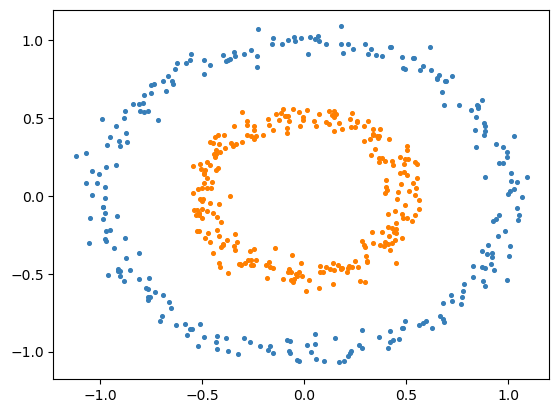

In [6]:
plot2d_data_sl(res_noisy_circles)

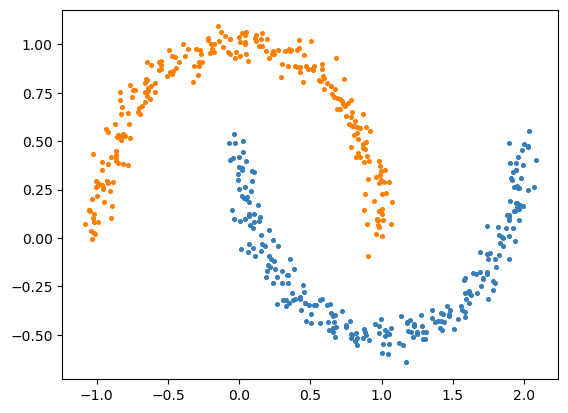

In [7]:
plot2d_data_sl(res_noisy_moons)

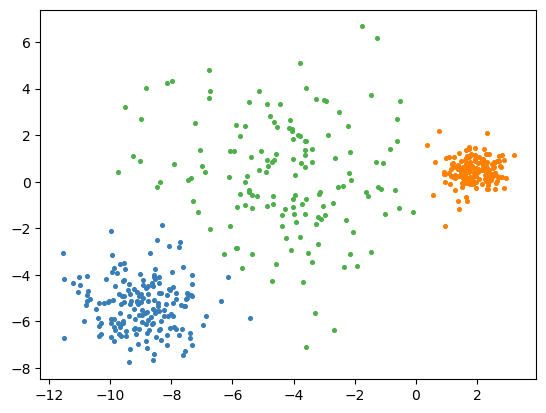

In [8]:
plot2d_data_sl(res_varied)

## Parameter adjustment for aniso
* When using knn=15, the two upper left lines get clustered together, except for a small region in the most upper left corner.
* knn=10 gives more accurate three regions, though lower part of the middle one gets strangely related to lower right cluster

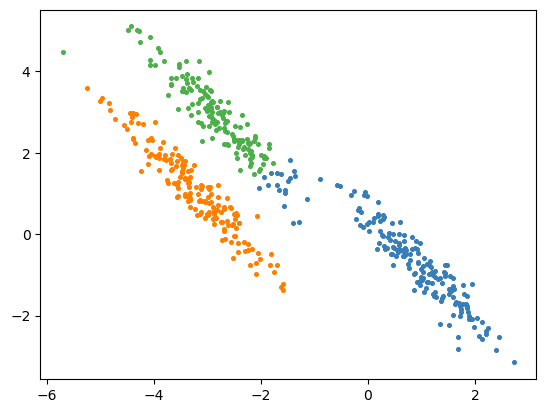

In [9]:
plot2d_data_sl(res_aniso)

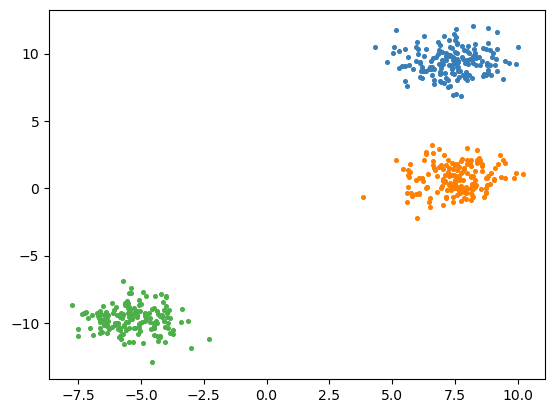

In [10]:
plot2d_data_sl(res_blobs)

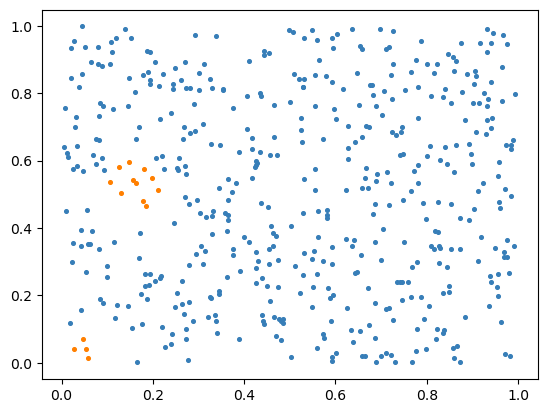

In [11]:
plot2d_data_sl(res_no_structure)